In [46]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pylab as plt

In [47]:
matplotlib.rc('figure', figsize=(15, 10))

In [48]:
#each of the 3IFS runs (2.8km.4km,9km) is stored in one zarr
ds_ifs = xr.open_zarr('/work/bm1235/a270046/cycle2-sync/ddh_output/4km')

In [49]:
ds_icon = xr.open_zarr('/work/bm1235/k203123/experiments/ngc2009/outdata/ngc2009_mtgrm.zarr')

In [50]:
ds = ds_icon

In [51]:
# we use only levels above MIN_LEVEL, this as the range more or less close to surface, where the log wind profile applies
MIN_LEVEL = 83    # for ICON

# MIN_LEVEL = 125 # for IFS

In [52]:
wind_speed = (ds.v**2 + ds.u**2)**0.5

In [53]:
wind_speed_example = wind_speed.sel(level=slice(MIN_LEVEL, None)).isel(station=10, time=230)

In [54]:
wind_speed_height = xr.DataArray(wind_speed_example, dims='height',
                                 coords={'height': wind_speed_example.level_height.values})

In [55]:
ref_height1 = 15
ref_height2 = 100

In [56]:
def calc_extrapolated(wind_speed_height):
    alpha = np.log(wind_speed_height.interp(height=ref_height1) / wind_speed_height.interp(height=ref_height2)) / np.log(ref_height1 / ref_height2)
    return wind_speed_height.interp(height=ref_height1) * (wind_speed_height.height / ref_height1)**alpha

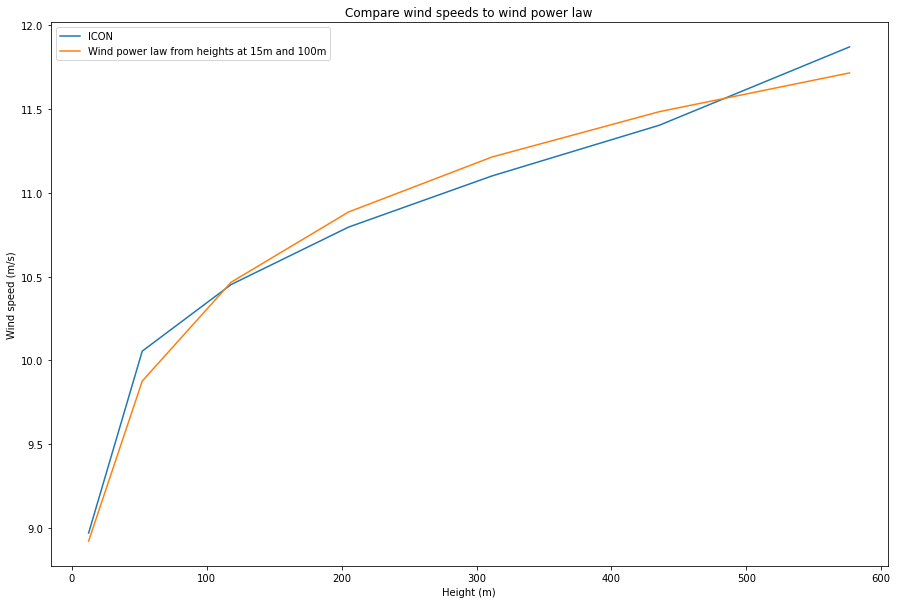

In [57]:
wind_speed_height.plot(label='ICON')
calc_extrapolated(wind_speed_height).plot(label=f'Wind power law from heights at {ref_height1}m and {ref_height2}m')
plt.legend()
plt.title('Compare wind speeds to wind power law')
plt.xlabel('Height (m)')
plt.ylabel('Wind speed (m/s)');

# Error when using wind power law 

In [58]:
wind_speed_height = xr.DataArray((wind_speed.sel(level=slice(MIN_LEVEL, None)).isel(time=slice(0, 10000)).values),
                                 dims=('time', 'height', 'station'),
                                 coords={'height': wind_speed.isel(station=0).sel(level=slice(MIN_LEVEL, None)).level_height.values})

In [59]:
error = calc_extrapolated(wind_speed_height) - wind_speed_height

In [60]:
error.mean()

<xarray.DataArray ()>
array(-0.44928864)

In [61]:
error.std()

<xarray.DataArray ()>
array(1.6176352)

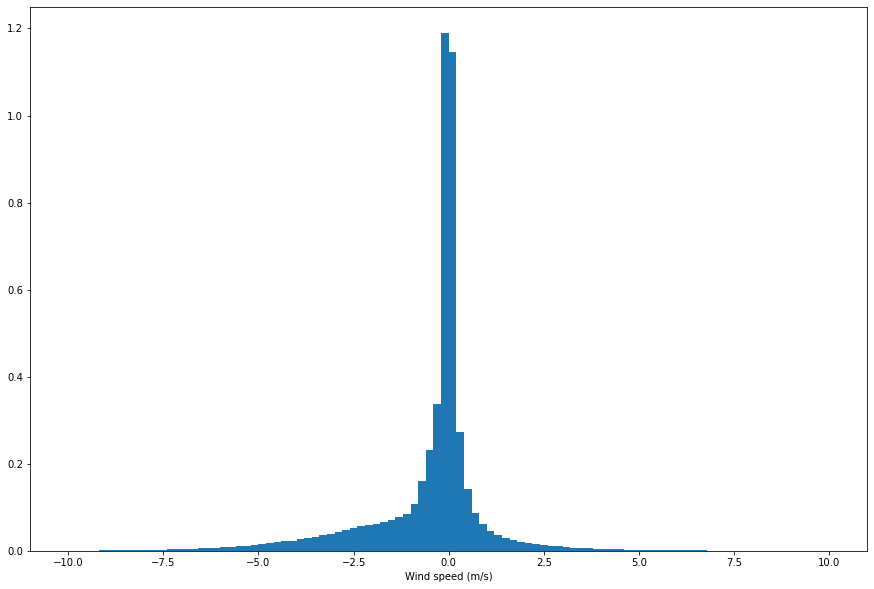

In [62]:
error.plot.hist(bins=100, range=(-10, 10), density=True);
plt.xlabel('Wind speed (m/s)');